<a href="https://colab.research.google.com/github/Viktoriia-kama/ML_hw4-hw16/blob/main/HW12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = y_train
y_test = y_test

x_train.shape, y_train.shape, x_test.shape, y_test.shape

4422102/4422102 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
from IPython.display import Image, display

def visualize_model(model):
  return Image(tf.keras.utils.model_to_dot(model).create_png())

def plot_history(hst):
  plt.figure(figsize=(13,4))

  plt.subplot(1, 2, 1)
  plt.plot(hst.history['loss'], label='train')
  plt.plot(hst.history['val_loss'], label='test')
  plt.title('Loss')
  # plt.legend()
  # plt.show()

  plt.subplot(1, 2, 2)
  plt.plot([round(100*e,2) for e in hst.history['sparse_categorical_accuracy']], label='train')
  plt.plot([round(100*e,2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
  plt.title('Accuracy')
  plt.ylim(0, 100)
  plt.legend()
  plt.tight_layout()
  plt.show()

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(10)
    ])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/4
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5262 - sparse_categorical_accuracy: 0.8114 - val_loss: 0.4620 - val_sparse_categorical_accuracy: 0.8408
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4330 - sparse_categorical_accuracy: 0.8460 - val_loss: 0.4970 - val_sparse_categorical_accuracy: 0.8259
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4103 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.4853 - val_sparse_categorical_accuracy: 0.8316
Epoch 4/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4007 - sparse_categorical_accuracy: 0.8582 - val_loss: 0.4637 - val_sparse_categorical_accuracy: 0.8471


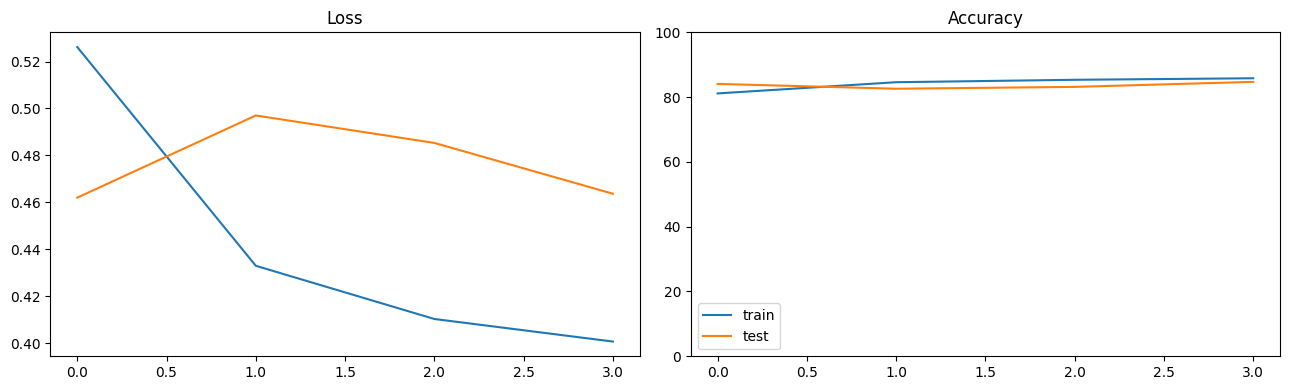

In [5]:
history = model.fit(x_train, y_train, epochs=4 ,validation_data=(x_test, y_test))
plot_history(history)

# Experiments with optimizers

Adam


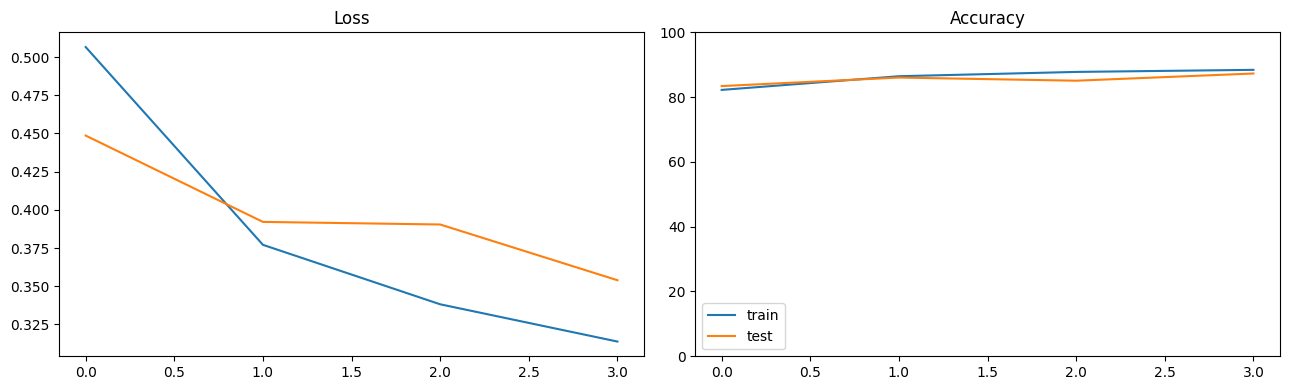

Adagrad


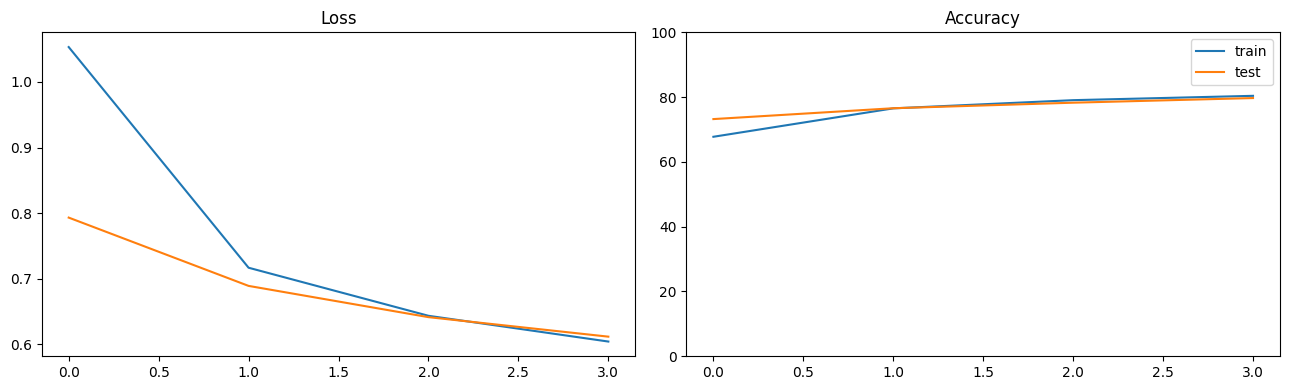

AdamW


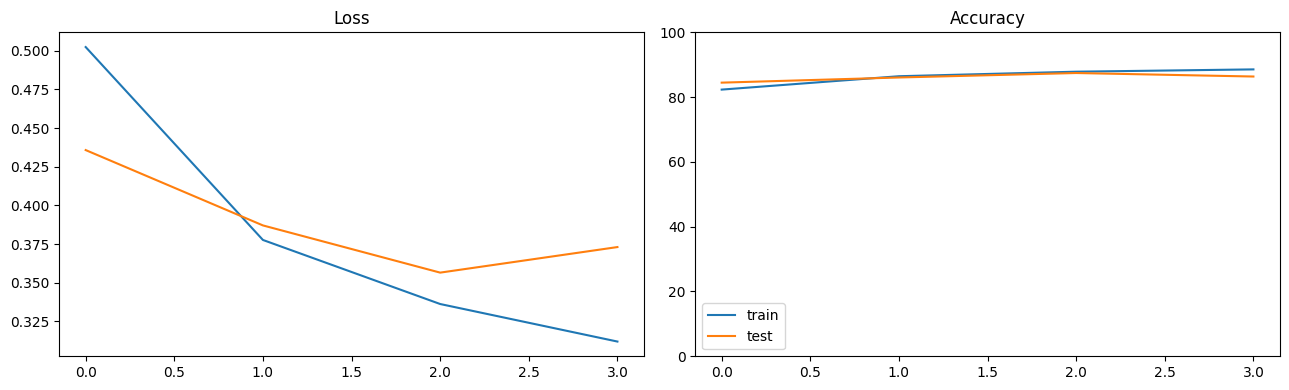

Adamax


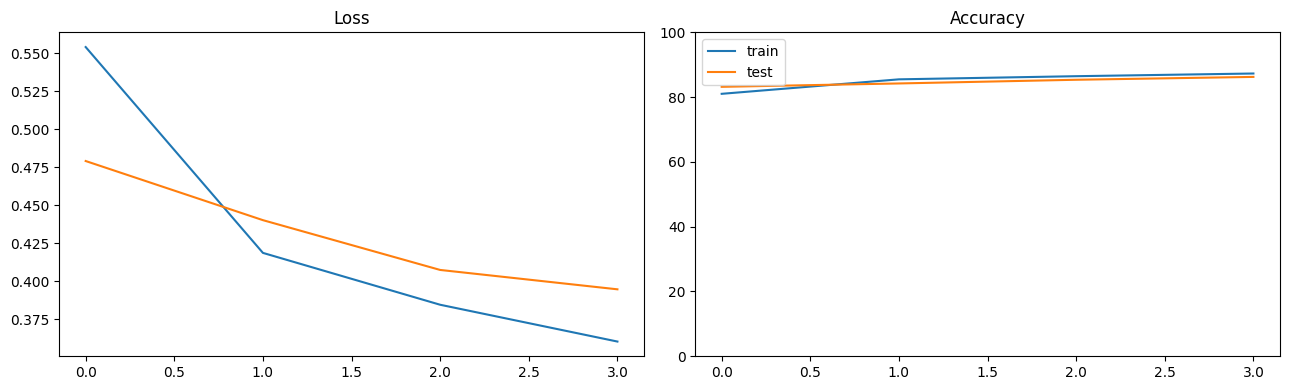

Ftrl


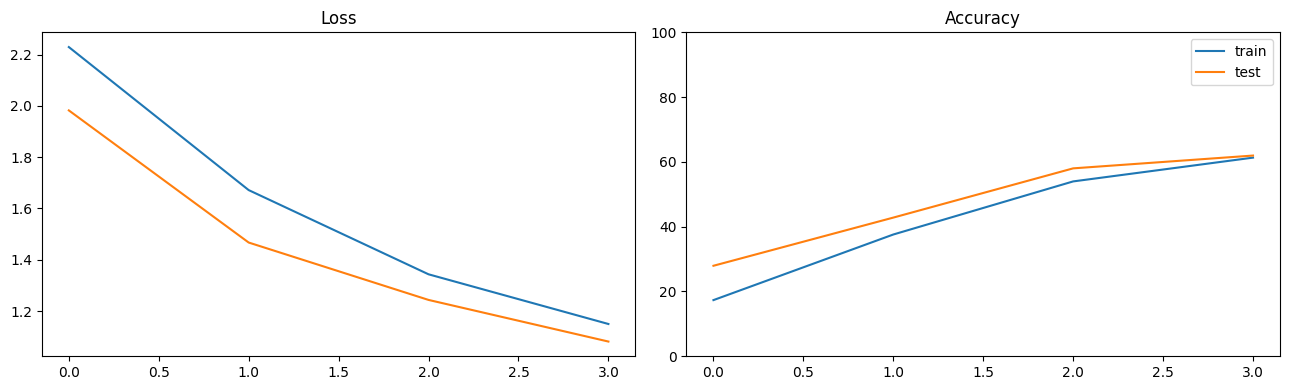

Lion


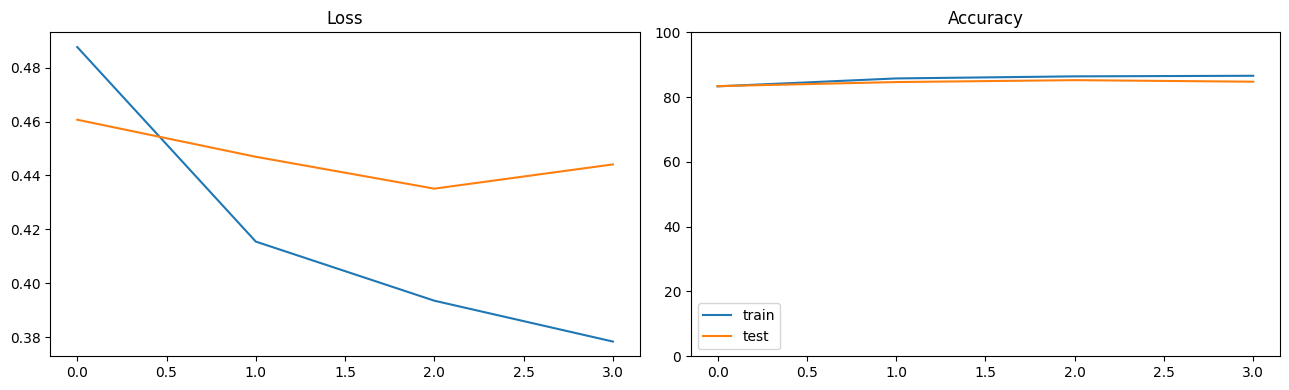

Nadam


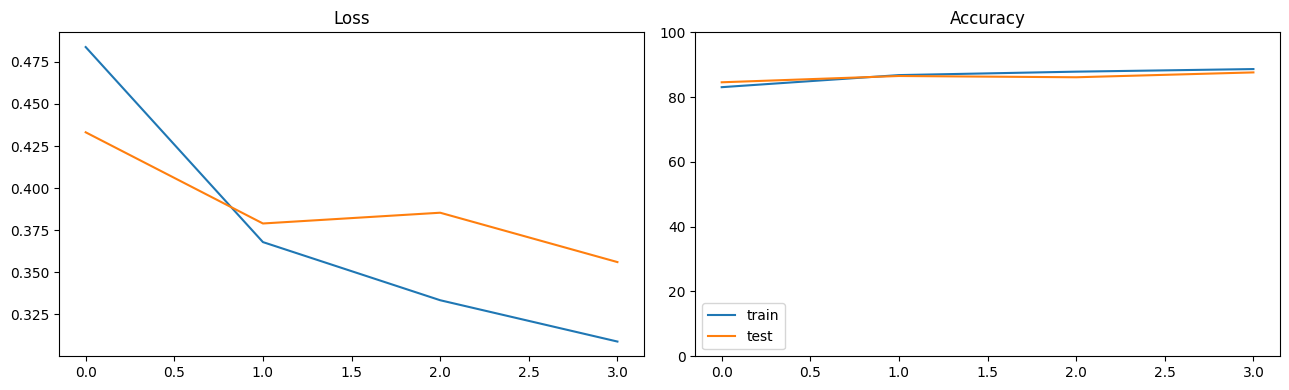

RMSprop


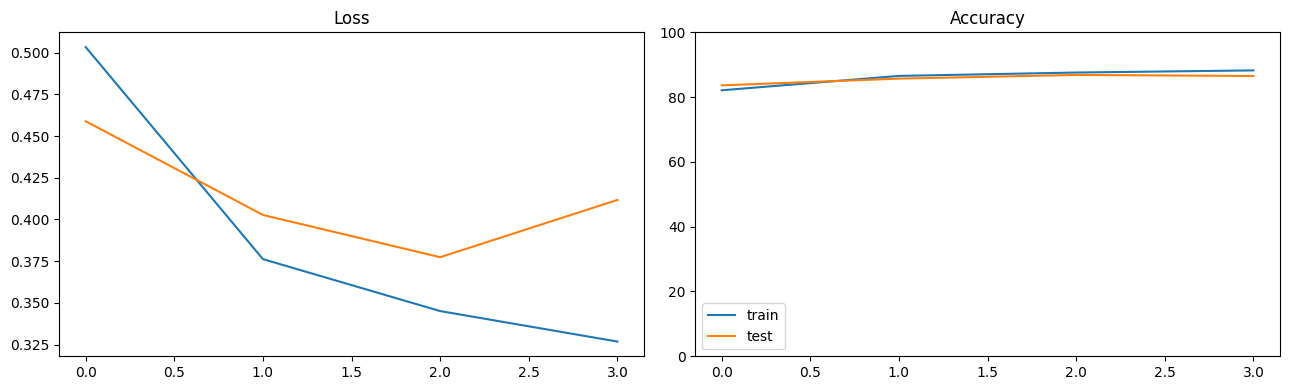

SGD


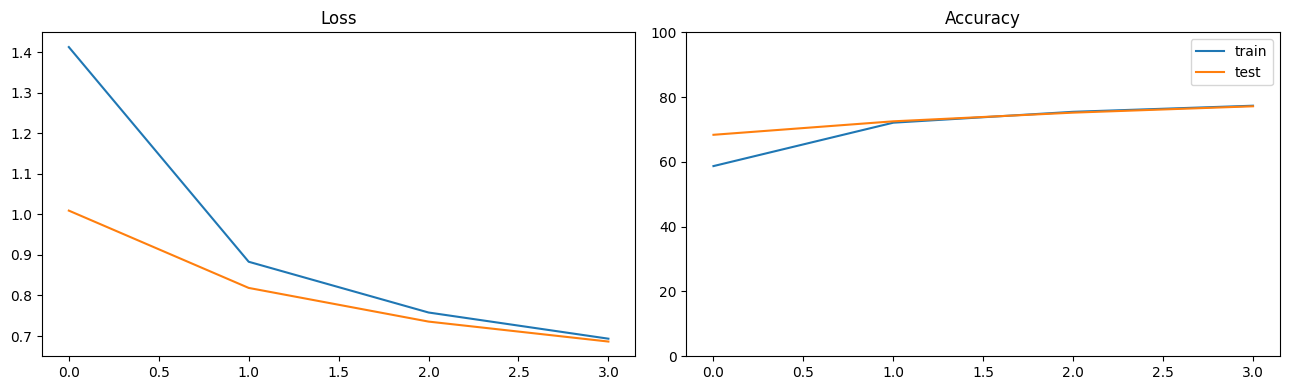

In [8]:
collect = {}

optimizers_list = [
    tf.keras.optimizers.Adam,
    tf.keras.optimizers.Adagrad,
    tf.keras.optimizers.AdamW,
    tf.keras.optimizers.Adamax,
    tf.keras.optimizers.Ftrl,
    tf.keras.optimizers.Lion,
    tf.keras.optimizers.Nadam,
    tf.keras.optimizers.RMSprop,
    tf.keras.optimizers.SGD
    ]

for opt in optimizers_list:
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(units=128, activation='relu'),
      tf.keras.layers.Dense(10)
      ])
  model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=opt(learning_rate=0.001),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
      )
  # model.summary()
  history = model.fit(x_train, y_train, epochs=4 ,validation_data=(x_test, y_test), verbose=0)

  print(opt.__name__)
  plot_history(history)
  collect[opt.__name__] = history.history['val_sparse_categorical_accuracy']

In [9]:
pd.DataFrame(collect).T.style.background_gradient(cmap ='viridis')

,0,1,2,3
Adam,0.834100,0.860400,0.850700,0.872900
Adagrad,0.732200,0.765700,0.782800,0.797100
AdamW,0.844700,0.860600,0.874400,0.863600
Adamax,0.831800,0.842200,0.853600,0.862400
Ftrl,0.279400,0.428100,0.580100,0.619600
Lion,0.833900,0.846500,0.852400,0.847600
Nadam,0.845800,0.865200,0.861300,0.876300
RMSprop,0.836300,0.857100,0.868500,0.865200
SGD,0.683700,0.725300,0.752100,0.771700


З цієї типу хіт-меп видно, що оптимізатор Adam, Nadam, Adamax, AdamW та RMSprop показали найкращу точність, далі попрацюємо з ними

# Experiments with activation function

In [11]:
collect = {}

activations_list = [
    'linear',
    'relu',
    'tanh',
    'elu',
    'swish',
    'softplus'
    ]

for act in activations_list:
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(units=1568, activation=act),
      tf.keras.layers.Dense(units=784, activation=act),
      tf.keras.layers.Dense(10)
      ])
  model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=tf.keras.optimizers.Adam(0.001),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
      )
  # model.summary()
  history = model.fit(x_train, y_train, epochs=4 ,validation_data=(x_test, y_test), verbose=0)

  print(act)
  collect[act] = history.history['val_sparse_categorical_accuracy']

linear
relu
tanh
elu
swish
softplus


heat-map with Adam

In [12]:
pd.DataFrame(collect).T.style.background_gradient(cmap ='viridis')

,0,1,2,3
linear,0.816500,0.797600,0.823600,0.835400
relu,0.850600,0.861600,0.868900,0.872500
tanh,0.824800,0.839800,0.848000,0.837700
elu,0.821700,0.851900,0.840200,0.857000
swish,0.849700,0.860700,0.866900,0.870700
softplus,0.834700,0.866800,0.867000,0.876900


In [13]:
collect = {}

activations_list = [
    'linear',
    'relu',
    'tanh',
    'elu',
    'swish',
    'softplus'
    ]

for act in activations_list:
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(units=1568, activation=act),
      tf.keras.layers.Dense(units=784, activation=act),
      tf.keras.layers.Dense(10)
      ])
  model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=tf.keras.optimizers.Nadam(0.001),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
      )
  # model.summary()
  history = model.fit(x_train, y_train, epochs=4 ,validation_data=(x_test, y_test), verbose=0)

  print(act)
  collect[act] = history.history['val_sparse_categorical_accuracy']

linear
relu
tanh
elu
swish
softplus


heat-map with Nadam

In [14]:
pd.DataFrame(collect).T.style.background_gradient(cmap ='viridis')

,0,1,2,3
linear,0.815300,0.827700,0.833100,0.824300
relu,0.826700,0.855800,0.863800,0.875400
tanh,0.812400,0.824700,0.843300,0.849100
elu,0.820100,0.851500,0.867000,0.865000
swish,0.836000,0.859600,0.866400,0.865900
softplus,0.839000,0.863900,0.871900,0.878800


In [15]:
collect = {}

activations_list = [
    'linear',
    'relu',
    'tanh',
    'elu',
    'swish',
    'softplus'
    ]

for act in activations_list:
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(units=1568, activation=act),
      tf.keras.layers.Dense(units=784, activation=act),
      tf.keras.layers.Dense(10)
      ])
  model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=tf.keras.optimizers.Adamax(0.001),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
      )
  # model.summary()
  history = model.fit(x_train, y_train, epochs=4 ,validation_data=(x_test, y_test), verbose=0)

  print(act)
  collect[act] = history.history['val_sparse_categorical_accuracy']

linear
relu
tanh
elu
swish
softplus


heat-map with Adamax

In [16]:
pd.DataFrame(collect).T.style.background_gradient(cmap ='viridis')

,0,1,2,3
linear,0.779700,0.831100,0.828600,0.836600
relu,0.854800,0.873900,0.868900,0.878100
tanh,0.839700,0.863300,0.860100,0.874400
elu,0.839600,0.850200,0.859800,0.876100
swish,0.841900,0.862800,0.871400,0.875300
softplus,0.832500,0.841600,0.847400,0.859900


In [17]:
collect = {}

activations_list = [
    'linear',
    'relu',
    'tanh',
    'elu',
    'swish',
    'softplus'
    ]

for act in activations_list:
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(units=1568, activation=act),
      tf.keras.layers.Dense(units=784, activation=act),
      tf.keras.layers.Dense(10)
      ])
  model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=tf.keras.optimizers.AdamW(0.001),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
      )
  # model.summary()
  history = model.fit(x_train, y_train, epochs=4 ,validation_data=(x_test, y_test), verbose=0)

  print(act)
  collect[act] = history.history['val_sparse_categorical_accuracy']

linear
relu
tanh
elu
swish
softplus


heat-map with AdamW

In [18]:
pd.DataFrame(collect).T.style.background_gradient(cmap ='viridis')

,0,1,2,3
linear,0.823300,0.789800,0.825500,0.818200
relu,0.856800,0.858100,0.873200,0.872200
tanh,0.833700,0.833700,0.847300,0.832500
elu,0.841800,0.843100,0.843200,0.834100
swish,0.848700,0.860200,0.853400,0.866500
softplus,0.833200,0.863800,0.877400,0.873300


In [19]:
collect = {}

activations_list = [
    'linear',
    'relu',
    'tanh',
    'elu',
    'swish',
    'softplus'
    ]

for act in activations_list:
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(units=1568, activation=act),
      tf.keras.layers.Dense(units=784, activation=act),
      tf.keras.layers.Dense(10)
      ])
  model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=tf.keras.optimizers.RMSprop(0.001),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
      )
  # model.summary()
  history = model.fit(x_train, y_train, epochs=4 ,validation_data=(x_test, y_test), verbose=0)

  print(act)
  collect[act] = history.history['val_sparse_categorical_accuracy']

linear
relu
tanh
elu
swish
softplus


heat-map with RMSprop

In [20]:
pd.DataFrame(collect).T.style.background_gradient(cmap ='viridis')

,0,1,2,3
linear,0.796900,0.807100,0.822300,0.800800
relu,0.828900,0.842200,0.843800,0.862800
tanh,0.847800,0.836400,0.831100,0.855600
elu,0.773200,0.835900,0.844000,0.844400
swish,0.842900,0.849600,0.866600,0.867600
softplus,0.842200,0.813200,0.830300,0.820800


З результів експерименту за функціями активації лідерами є:
* Nadam softplus 878
* Adamax relu 878
* Adam softplus 876
* Adamax 876

Experiments with epochs

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5349 - sparse_categorical_accuracy: 0.8144 - val_loss: 0.4475 - val_sparse_categorical_accuracy: 0.8385
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3952 - sparse_categorical_accuracy: 0.8584 - val_loss: 0.4230 - val_sparse_categorical_accuracy: 0.8441
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3546 - sparse_categorical_accuracy: 0.8712 - val_loss: 0.3923 - val_sparse_categorical_accuracy: 0.8576
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3277 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.3738 - val_sparse_categorical_accuracy: 0.8656
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3118 - sparse_categorical_accuracy: 0.8862 - val_loss: 0.3686 - val_sparse_categorical_accuracy: 0.8682
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2964 - sp

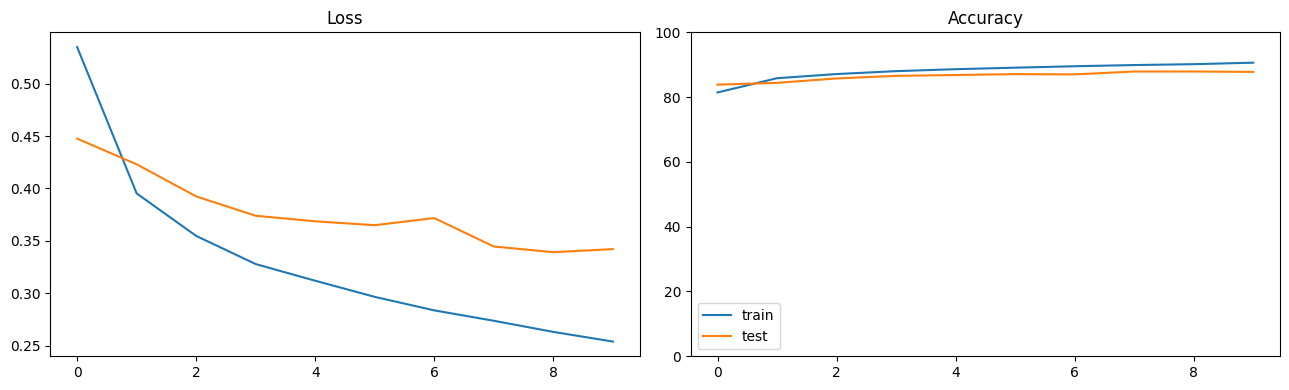

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=64, activation='softplus'),
    tf.keras.layers.Dense(10)
    ])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plot_history(history)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5946 - sparse_categorical_accuracy: 0.8035 - val_loss: 0.4972 - val_sparse_categorical_accuracy: 0.8300
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4461 - sparse_categorical_accuracy: 0.8467 - val_loss: 0.4607 - val_sparse_categorical_accuracy: 0.8398
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4131 - sparse_categorical_accuracy: 0.8572 - val_loss: 0.4535 - val_sparse_categorical_accuracy: 0.8333
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3913 - sparse_categorical_accuracy: 0.8640 - val_loss: 0.4186 - val_sparse_categorical_accuracy: 0.8514
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3755 - sparse_categorical_accuracy: 0.8691 - val_loss: 0.4045 - val_sparse_categorical_accuracy: 0.8569
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3631 - spar

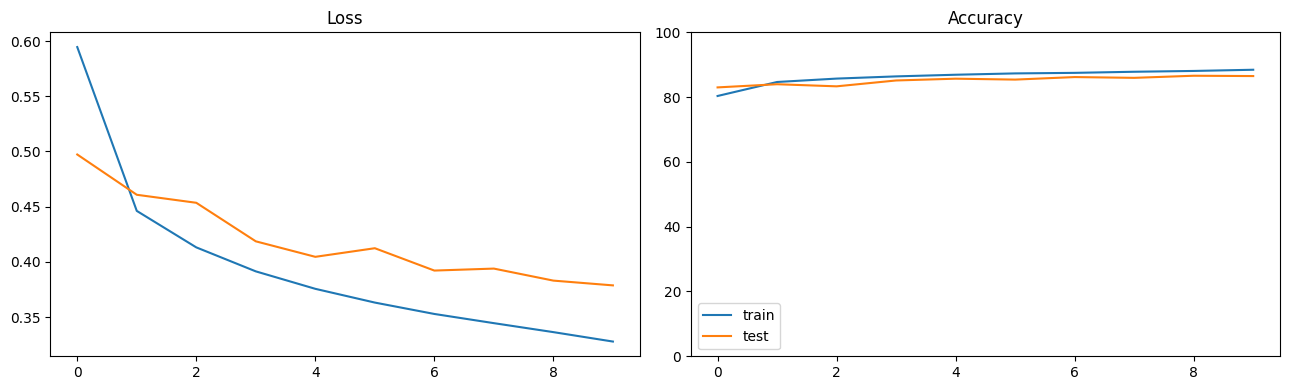

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(10)
    ])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plot_history(history)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5226 - sparse_categorical_accuracy: 0.8192 - val_loss: 0.4702 - val_sparse_categorical_accuracy: 0.8359
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3984 - sparse_categorical_accuracy: 0.8586 - val_loss: 0.4140 - val_sparse_categorical_accuracy: 0.8498
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3588 - sparse_categorical_accuracy: 0.8715 - val_loss: 0.3943 - val_sparse_categorical_accuracy: 0.8607
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3321 - sparse_categorical_accuracy: 0.8793 - val_loss: 0.3680 - val_sparse_categorical_accuracy: 0.8669
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3132 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.3572 - val_sparse_categorical_accuracy: 0.8715
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2983 - spar

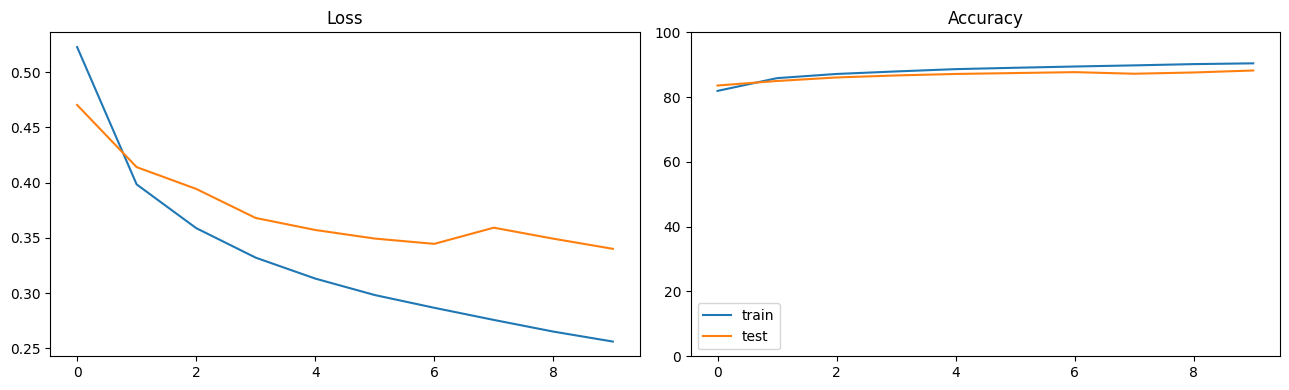

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=64, activation='softplus'),
    tf.keras.layers.Dense(10)
    ])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plot_history(history)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5677 - sparse_categorical_accuracy: 0.8058 - val_loss: 0.4887 - val_sparse_categorical_accuracy: 0.8296
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4363 - sparse_categorical_accuracy: 0.8474 - val_loss: 0.4456 - val_sparse_categorical_accuracy: 0.8450
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4031 - sparse_categorical_accuracy: 0.8577 - val_loss: 0.4270 - val_sparse_categorical_accuracy: 0.8478
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3811 - sparse_categorical_accuracy: 0.8645 - val_loss: 0.4164 - val_sparse_categorical_accuracy: 0.8521
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3660 - sparse_categorical_accuracy: 0.8694 - val_loss: 0.4030 - val_sparse_categorical_accuracy: 0.8568
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3524 - sp

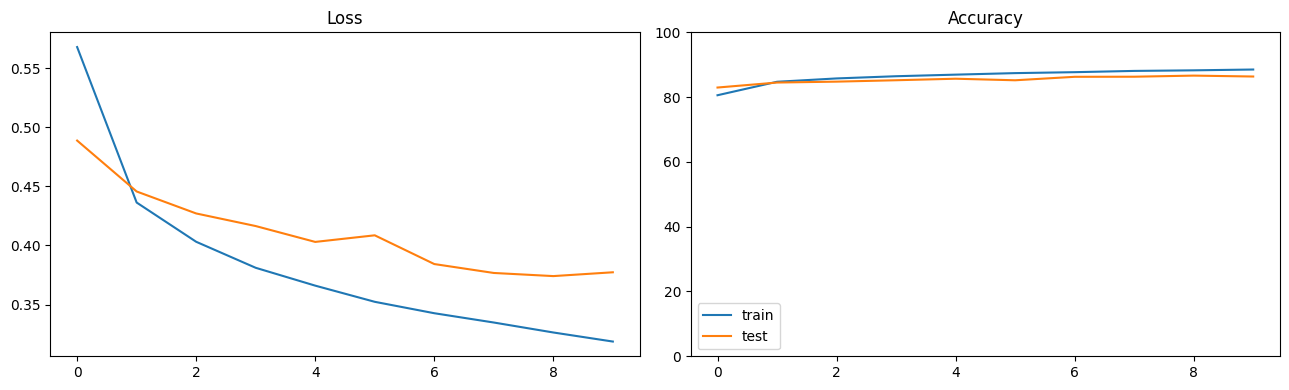

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=64, activation='elu'),
    tf.keras.layers.Dense(10)
    ])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plot_history(history)

In [46]:

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(units=64, activation='softplus'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
  ])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
history = model.fit(x_train, y_train, epochs=9, validation_data=(x_test, y_test))



Epoch 1/9
1875/1875 [==============================] - 39s 4ms/step - loss: 0.5577 - sparse_categorical_accuracy: 0.8019 - val_loss: 0.4439 - val_sparse_categorical_accuracy: 0.8416
Epoch 2/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4136 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.4058 - val_sparse_categorical_accuracy: 0.8513
Epoch 3/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3759 - sparse_categorical_accuracy: 0.8629 - val_loss: 0.3816 - val_sparse_categorical_accuracy: 0.8645
Epoch 4/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3503 - sparse_categorical_accuracy: 0.8701 - val_loss: 0.3761 - val_sparse_categorical_accuracy: 0.8601
Epoch 5/9
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3336 - sparse_categorical_accuracy: 0.8771 - val_loss: 0.3653 - val_sparse_categorical_accuracy: 0.8676
Epoch 6/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3179 - sparse_ca

Experiment with batch_size

In [9]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(units=64, activation='softplus'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(15)
  ])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
history = model.fit(x_train, y_train, epochs=6, batch_size = 64, validation_data=(x_test, y_test))


Epoch 1/6
938/938 [==============================] - 7s 7ms/step - loss: 0.6160 - sparse_categorical_accuracy: 0.7862 - val_loss: 0.4699 - val_sparse_categorical_accuracy: 0.8331
Epoch 2/6
938/938 [==============================] - 3s 4ms/step - loss: 0.4374 - sparse_categorical_accuracy: 0.8425 - val_loss: 0.4201 - val_sparse_categorical_accuracy: 0.8456
Epoch 3/6
938/938 [==============================] - 3s 3ms/step - loss: 0.3933 - sparse_categorical_accuracy: 0.8579 - val_loss: 0.3944 - val_sparse_categorical_accuracy: 0.8591
Epoch 4/6
938/938 [==============================] - 4s 5ms/step - loss: 0.3680 - sparse_categorical_accuracy: 0.8664 - val_loss: 0.3823 - val_sparse_categorical_accuracy: 0.8639
Epoch 5/6
938/938 [==============================] - 3s 4ms/step - loss: 0.3498 - sparse_categorical_accuracy: 0.8723 - val_loss: 0.3704 - val_sparse_categorical_accuracy: 0.8680
Epoch 6/6
938/938 [==============================] - 3s 3ms/step - loss: 0.3350 - sparse_categorical_accu

In [11]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(units=64, activation='softplus'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
  ])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
history = model.fit(x_train, y_train, epochs=11, batch_size = 32, validation_data=(x_test, y_test))


Epoch 1/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5541 - sparse_categorical_accuracy: 0.8040 - val_loss: 0.4433 - val_sparse_categorical_accuracy: 0.8400
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4095 - sparse_categorical_accuracy: 0.8520 - val_loss: 0.3968 - val_sparse_categorical_accuracy: 0.8563
Epoch 3/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3720 - sparse_categorical_accuracy: 0.8645 - val_loss: 0.3780 - val_sparse_categorical_accuracy: 0.8609
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3474 - sparse_categorical_accuracy: 0.8746 - val_loss: 0.3657 - val_sparse_categorical_accuracy: 0.8671
Epoch 5/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3317 - sparse_categorical_accuracy: 0.8794 - val_loss: 0.3656 - val_sparse_categorical_accuracy: 0.8664
Epoch 6/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3173 - spars

In [17]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(units=64, activation='softplus'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
  ])
early_stopping = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=2, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size = 32,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5566 - sparse_categorical_accuracy: 0.8044 - val_loss: 0.4414 - val_sparse_categorical_accuracy: 0.8424
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4097 - sparse_categorical_accuracy: 0.8509 - val_loss: 0.4073 - val_sparse_categorical_accuracy: 0.8502
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3728 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.3726 - val_sparse_categorical_accuracy: 0.8656
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3480 - sparse_categorical_accuracy: 0.8719 - val_loss: 0.3725 - val_sparse_categorical_accuracy: 0.8670
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3299 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.3571 - val_sparse_categorical_accuracy: 0.8713
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3167 - spar

# Висновки

Для покращення результату тренування моделі я проекспериментувала з такими гіперпараметрами:
* функції активації;
* кількість епох;
* розмір батчу;
* вибір оптимізатора;
* різні техніки регуляризації (Dropout,EarlyStopping)


Отже, найкращий результат тренування моделі, якого мені вдалося досягти - точність на тестових даних 88,59%. Модель має такі гіперпараметри:
* epochs=50 (після 23 почалось overfitting)
* batch_size = 32
* callbacks=[early_stopping]
* activation='softplus'
* Dropout(0.1)
* Nadam(learning_rate=0.001)
